In [1]:
#1 The distance between the bosch plant and the location of the weather station

In [1]:
from geopy import distance
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#latitude, #longitude
plant_location = (48.49524, 9.13782) 
station_location = (48.54, 9.27)

In [3]:
distance_in_km = distance.distance(plant_location, station_location).km

In [4]:
distance_in_km

10.960250035854248

In [5]:
#reading the file

In [6]:

dataset = pd.read_csv("produkt_tu_stunde_20090401_20221231_03278.txt",sep=";",header=0)

In [7]:
dataset.head()


,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor
0,3278,2009040100,3,4.3,81.0,eor
1,3278,2009040101,3,3.2,84.0,eor
2,3278,2009040102,3,2.2,88.0,eor
3,3278,2009040103,3,1.6,89.0,eor
4,3278,2009040104,3,1.2,92.0,eor


In [8]:
dataset.dtypes

STATIONS_ID      int64
MESS_DATUM       int64
QN_9             int64
TT_TU          float64
RF_TU          float64
eor             object
dtype: object

In [9]:
#setting column names
dataset = dataset.rename(columns ={"MESS_DATUM": "date_hour", "TT_TU": "air_temperature", "RF_TU": "relative_humidity" }) 

In [10]:
dataset.tail(10)

,STATIONS_ID,date_hour,QN_9,air_temperature,relative_humidity,eor
120542,3278,2022123114,3,19.3,50.0,eor
120543,3278,2022123115,3,18.4,54.0,eor
120544,3278,2022123116,3,16.4,61.0,eor
120545,3278,2022123117,3,13.5,71.0,eor
120546,3278,2022123118,3,12.9,75.0,eor
120547,3278,2022123119,3,12.9,73.0,eor
120548,3278,2022123120,3,10.9,81.0,eor
120549,3278,2022123121,3,10.4,85.0,eor
120550,3278,2022123122,3,10.4,84.0,eor
120551,3278,2022123123,3,9.6,84.0,eor


In [11]:
#setting types
dataset.date_hour = pd.to_datetime(dataset.date_hour, format="%Y%m%d%H")

In [12]:
dataset.head(10)

,STATIONS_ID,date_hour,QN_9,air_temperature,relative_humidity,eor
0,3278,2009-04-01 00:00:00,3,4.3,81.0,eor
1,3278,2009-04-01 01:00:00,3,3.2,84.0,eor
2,3278,2009-04-01 02:00:00,3,2.2,88.0,eor
3,3278,2009-04-01 03:00:00,3,1.6,89.0,eor
4,3278,2009-04-01 04:00:00,3,1.2,92.0,eor
5,3278,2009-04-01 05:00:00,3,2.8,90.0,eor
6,3278,2009-04-01 06:00:00,3,3.5,86.0,eor
7,3278,2009-04-01 07:00:00,3,4.1,86.0,eor
8,3278,2009-04-01 08:00:00,3,5.1,84.0,eor
9,3278,2009-04-01 09:00:00,3,5.8,80.0,eor


In [13]:
dataset.dtypes

STATIONS_ID                   int64
date_hour            datetime64[ns]
QN_9                          int64
air_temperature             float64
relative_humidity           float64
eor                          object
dtype: object

In [14]:
#dropping unnecessary columns 
dataset = dataset.drop(columns = ["STATIONS_ID","QN_9", "eor"] )

In [15]:
dataset.head(10)

,date_hour,air_temperature,relative_humidity
0,2009-04-01 00:00:00,4.3,81.0
1,2009-04-01 01:00:00,3.2,84.0
2,2009-04-01 02:00:00,2.2,88.0
3,2009-04-01 03:00:00,1.6,89.0
4,2009-04-01 04:00:00,1.2,92.0
5,2009-04-01 05:00:00,2.8,90.0
6,2009-04-01 06:00:00,3.5,86.0
7,2009-04-01 07:00:00,4.1,86.0
8,2009-04-01 08:00:00,5.1,84.0
9,2009-04-01 09:00:00,5.8,80.0


In [16]:
#setting proper missing values type

In [17]:
dataset.loc[dataset.air_temperature == -999, "air_temperature"] 

40059   -999.0
40060   -999.0
40061   -999.0
40062   -999.0
40063   -999.0
         ...  
40115   -999.0
96415   -999.0
96416   -999.0
96417   -999.0
96418   -999.0
Name: air_temperature, Length: 61, dtype: float64

In [18]:
dataset.loc[dataset.air_temperature == -999, "air_temperature"]  = np.nan

In [19]:
dataset.air_temperature.isna().sum()

61

In [20]:
dataset.loc[dataset.relative_humidity == -999, "relative_humidity"] 

18638   -999.0
18639   -999.0
18640   -999.0
18641   -999.0
18642   -999.0
         ...  
40115   -999.0
96415   -999.0
96416   -999.0
96417   -999.0
96418   -999.0
Name: relative_humidity, Length: 80, dtype: float64

In [21]:
dataset.loc[dataset.relative_humidity == -999, "relative_humidity"] = np.nan

In [22]:
dataset.relative_humidity.isna().sum()

80

In [23]:
#2.Describe the general properties of the dataset.

#There are 120 552 samples in the dataset. Date range is from 2009-04-01 to 2022-12-31
dataset.date_hour.describe(datetime_is_numeric=True)

count                 120552
mean     2016-02-15 11:30:00
min      2009-04-01 00:00:00
25%      2012-09-07 17:45:00
50%      2016-02-15 11:30:00
75%      2019-07-25 05:15:00
max      2022-12-31 23:00:00
Name: date_hour, dtype: object

In [24]:
#there are 61 missing values in air_temperature variable 

In [25]:
dataset.air_temperature.isna().sum()

61

In [26]:
#there are 80 missing values in air_temperature variable 

In [27]:
dataset.relative_humidity.isna().sum()

80

In [28]:
#filtering out missing values for analytics purporse

In [29]:
dataset_filtered = dataset.dropna(subset=["air_temperature", "relative_humidity"])

In [ ]:
#80 rows were filtered out

In [31]:
dataset_filtered.date_hour.describe(datetime_is_numeric=True)

count                           120472
mean     2016-02-16 02:25:02.430440192
min                2009-04-01 00:00:00
25%                2012-09-07 16:45:00
50%                2016-02-16 23:30:00
75%                2019-07-25 21:15:00
max                2022-12-31 23:00:00
Name: date_hour, dtype: object

In [31]:
#mean, median, variance, and standard deviation for air_temperature and relative_humidity
dataset_filtered.agg({"air_temperature": [np.mean,np.median,np.var,np.std]\
                     ,"relative_humidity": [np.mean,np.median,np.var,np.std]})

,air_temperature,relative_humidity
mean,10.934321,74.119322
median,10.800000,79.000000
var,67.656674,359.078730
std,8.225368,18.949373


In [32]:
#range and interquartile range for air_temperature 
IQR_air_temperature = np.percentile(dataset_filtered.air_temperature, 75)\
                      -\
                      np.percentile(dataset_filtered.air_temperature, 25)

In [33]:
IQR_air_temperature 

12.100000000000001

In [34]:
range_air_temperature = np.max(dataset_filtered.air_temperature) - np.min(dataset_filtered.air_temperature)

In [35]:
range_air_temperature

55.5

In [36]:
#range and interquartile range for relative_humidity

In [37]:
IQR_relative_humidity = np.percentile(dataset_filtered.relative_humidity, 75)\
                      -\
                      np.percentile(dataset_filtered.relative_humidity, 25)

In [38]:
IQR_relative_humidity

28.0

In [39]:
range_relative_humidity = np.max(dataset_filtered.relative_humidity) - np.min(dataset_filtered.relative_humidity)

In [40]:
range_relative_humidity

89.0

In [41]:
#correlation coefficient between air_temperature and relative_humidity

np.corrcoef(dataset_filtered.air_temperature, dataset_filtered.relative_humidity)

array([[ 1.        , -0.57003342],
       [-0.57003342,  1.        ]])

In [43]:
#extracting hour, month and year
dataset_filtered["hour"] = [int(x.hour) for x in dataset_filtered.date_hour]

C:\Windows\Temp\ipykernel_18544\159835487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered["hour"] = [int(x.hour) for x in dataset_filtered.date_hour]


In [44]:
dataset_filtered["month"] = [int(x.month) for x in dataset_filtered.date_hour]

C:\Windows\Temp\ipykernel_18544\3295492424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered["month"] = [int(x.month) for x in dataset_filtered.date_hour]


In [45]:
dataset_filtered["year"] = [int(x.year) for x in dataset_filtered.date_hour]

C:\Windows\Temp\ipykernel_18544\3248946575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered["year"] = [int(x.year) for x in dataset_filtered.date_hour]


In [46]:
dataset_filtered

,date_hour,air_temperature,relative_humidity,hour,month,year
0,2009-04-01 00:00:00,4.3,81.0,0,4,2009
1,2009-04-01 01:00:00,3.2,84.0,1,4,2009
2,2009-04-01 02:00:00,2.2,88.0,2,4,2009
3,2009-04-01 03:00:00,1.6,89.0,3,4,2009
4,2009-04-01 04:00:00,1.2,92.0,4,4,2009
...,...,...,...,...,...,...
120547,2022-12-31 19:00:00,12.9,73.0,19,12,2022
120548,2022-12-31 20:00:00,10.9,81.0,20,12,2022
120549,2022-12-31 21:00:00,10.4,85.0,21,12,2022
120550,2022-12-31 22:00:00,10.4,84.0,22,12,2022


In [47]:
#correlation coefficients between datetime and the given variables - just for check ;))))

np.corrcoef(dataset_filtered.hour, dataset_filtered.air_temperature)

array([[1.        , 0.15712907],
       [0.15712907, 1.        ]])

In [48]:
np.corrcoef(dataset_filtered.month, dataset_filtered.air_temperature)

array([[1.        , 0.14328932],
       [0.14328932, 1.        ]])

In [49]:
np.corrcoef(dataset_filtered.hour, dataset_filtered.relative_humidity)

array([[ 1.        , -0.25314056],
       [-0.25314056,  1.        ]])

In [50]:
np.corrcoef(dataset_filtered.month, dataset_filtered.relative_humidity)

array([[1.        , 0.16592354],
       [0.16592354, 1.        ]])

In [51]:
#3. minimum, maximum and average temperature in January 2017

In [52]:
dataset_filtered.dtypes

date_hour            datetime64[ns]
air_temperature             float64
relative_humidity           float64
hour                          int64
month                         int64
year                          int64
dtype: object

In [32]:
dataset_filtered.loc[(dataset_filtered.date_hour >= "2017-01-01 00:00:00")\
                     & (dataset_filtered.date_hour <= "2017-01-31 23:00:00")].head(5)

,date_hour,air_temperature,relative_humidity
67968,2017-01-01 00:00:00,-7.1,91.0
67969,2017-01-01 01:00:00,-7.1,91.0
67970,2017-01-01 02:00:00,-6.4,91.0
67971,2017-01-01 03:00:00,-7.7,91.0
67972,2017-01-01 04:00:00,-8.7,90.0


In [33]:
#answer
dataset_filtered.loc[(dataset_filtered.date_hour >= "2017-01-01 00:00:00")\
                     & (dataset_filtered.date_hour <= "2017-01-31 23:00:00")]\
                    .agg({"air_temperature": [np.min, np.mean, np.max]  })

,air_temperature
amin,-15.200000
mean,-2.640323
amax,8.800000


In [55]:
#4 As a result of climate change the average temperature and standard deviation should rise over the periods.

In [56]:
#Median temperature in 2022 was the second highest observation in a given period. However, basing on the table below, there is no much evidence that 
#average temperature is continuously rising. 

dataset_filtered.groupby(["year"]).agg({"air_temperature":[np.mean, np.median, np.std]})

air_temperature                 
                mean median       std
year                                 
2009       13.071091   13.3  7.425017
2010        9.156769    9.3  8.810784
2011       10.882325   10.8  8.036613
2012       10.448509   10.2  8.737361
2013        9.828048    9.9  8.381735
2014       11.380696   11.3  6.973874
2015       11.232237   10.8  8.292154
2016       10.523019    9.8  8.063998
2017       10.705297   10.3  8.548428
2018       11.656553   11.5  8.586559
2019       11.155228   10.7  8.119939
2020       11.528394   11.4  7.773948
2021       10.161918    9.6  7.916834
2022       11.871073   11.6  8.428305

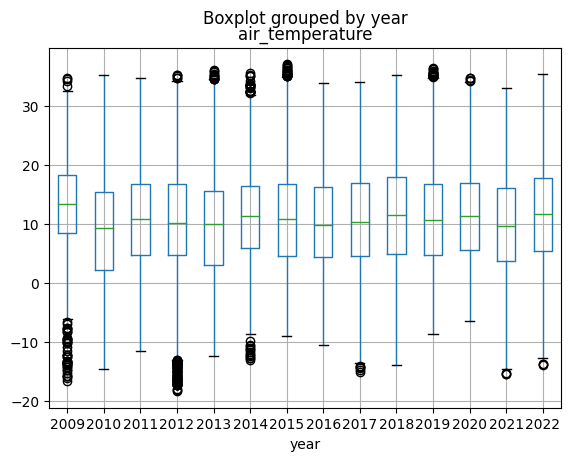

In [57]:
#The same story for boxplot
dataset_filtered.boxplot("air_temperature", by = "year")
plt.show()

In [112]:
#Let's try daily aggregation and than compare observations across different years 

dataset_filtered_daily =dataset_filtered.groupby([dataset_filtered["date_hour"].dt.date]).agg({"air_temperature": [np.mean, np.std]})

In [114]:
#reseting indexes
dataset_filtered_daily = dataset_filtered_daily.reset_index(drop = False, inplace = False)

In [115]:
dataset_filtered_daily

date_hour air_temperature          
                            mean       std
0     2009-04-01        7.379167  3.838702
1     2009-04-02       14.075000  4.681903
2     2009-04-03       13.266667  4.223090
3     2009-04-04       12.070833  3.813760
4     2009-04-05       11.600000  2.573274
...          ...             ...       ...
5017  2022-12-27        3.000000  2.879915
5018  2022-12-28        5.925000  4.205819
5019  2022-12-29       10.895833  1.606097
5020  2022-12-30        8.245833  3.522102
5021  2022-12-31       15.212500  2.949180

[5022 rows x 3 columns]

In [117]:
dataset_filtered_daily.columns = [x + y.capitalize() for x, y in dataset_filtered_daily.columns]

In [118]:
dataset_filtered_daily

,date_hour,air_temperatureMean,air_temperatureStd
0,2009-04-01,7.379167,3.838702
1,2009-04-02,14.075000,4.681903
2,2009-04-03,13.266667,4.223090
3,2009-04-04,12.070833,3.813760
4,2009-04-05,11.600000,2.573274
...,...,...,...
5017,2022-12-27,3.000000,2.879915
5018,2022-12-28,5.925000,4.205819
5019,2022-12-29,10.895833,1.606097
5020,2022-12-30,8.245833,3.522102


In [127]:
#extracting year and day of year
dataset_filtered_daily["year"] = [x.year for x in dataset_filtered_daily.date_hour]

In [134]:
dataset_filtered_daily.date_hour = pd.to_datetime(dataset_filtered_daily.date_hour, format="%Y-%m-%d")


In [137]:
dataset_filtered_daily["day_of_year"] = [x.dayofyear for x in dataset_filtered_daily.date_hour]

In [139]:
dataset_filtered_daily.head()

,date_hour,air_temperatureMean,air_temperatureStd,year,day_of_year
0,2009-04-01,7.379167,3.838702,2009,91
1,2009-04-02,14.075000,4.681903,2009,92
2,2009-04-03,13.266667,4.223090,2009,93
3,2009-04-04,12.070833,3.813760,2009,94
4,2009-04-05,11.600000,2.573274,2009,95


In [175]:
#setting colors for different years 
colors = ["#d9d7d7", "#d9d7d7", "#d9d7d7", "#d9d7d7", "#d9d7d7", "#d9d7d7", "#d9d7d7", "#d9d7d7", "#d9d7d7", "#d9d7d7"\
         ,"#d9d7d7","#d9d7d7","#d9d7d7","#212020"]

<AxesSubplot: xlabel='day_of_year', ylabel='air_temperatureMean'>

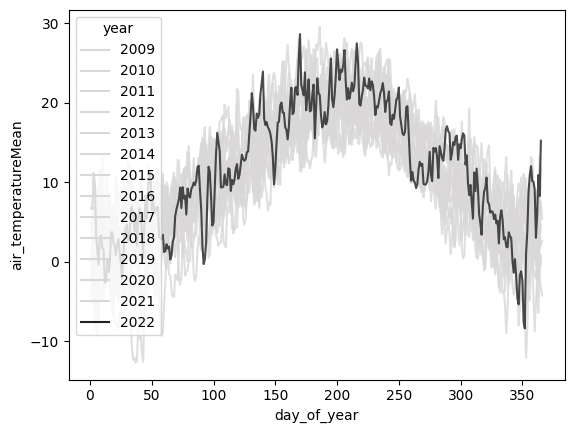

In [182]:
#the chart below shows that average temperatures at the end of 2022 were record high.

palette = sns.color_palette(colors)


sns.lineplot(data=dataset_filtered_daily, x='day_of_year', y='air_temperatureMean', hue='year', palette=palette, alpha=0.8)

In [192]:
#In order to check it the last observations for each year were selected 
#of the last 10 observations for all years, the largest average air_temperaturw is for 2022.
#in addition, 3 observations represents 2022 and 4 represents 2021
dataset_filtered_daily[dataset_filtered_daily.day_of_year > 360]\
    .sort_values(by="air_temperatureMean", ascending = False).head(10)

,date_hour,air_temperatureMean,air_temperatureStd,year,day_of_year
5021,2022-12-31,15.212500,2.949180,2022,365
4655,2021-12-30,13.229167,1.332692,2021,364
3195,2017-12-31,11.775000,1.547579,2017,365
5019,2022-12-29,10.895833,1.606097,2022,363
4656,2021-12-31,9.320833,2.758226,2021,365
4654,2021-12-29,9.245833,1.304834,2021,363
4653,2021-12-28,9.025000,2.140144,2021,362
5020,2022-12-30,8.245833,3.522102,2022,364
1366,2012-12-27,8.125000,1.205152,2012,362
1365,2012-12-26,7.904167,0.752086,2012,361
